– Exercise 1- Confidence Interval for Mean (Single Sample):

 • Scenario: A company tracks the delivery time (in days) for their products. A random sample of 50
 deliveries had an average time of 4.2 days with a sample standard deviation of 1.1 days.
 – Task:1
Compute 95% confidence interval for the population mean delivery time using the t- dis
tribution.

In [ ]:
import scipy.stats as stats
import numpy as np

In [ ]:

n = 50
sample_mean = 4.2
sample_std = 1.1
confidence = 0.95

#compute the standard error
se = sample_std / np.sqrt(n)

#get the critical t value (two-tailed) with df = n - 1
alpha = 1 - confidence
t_crit = stats.t.ppf(1 - alpha/2, df=n-1)

#compute the margin of error
me = t_crit * se

#build the confidence interval
ci_lower = sample_mean - me
ci_upper = sample_mean + me

print(f"Standard Error: {se:.6f}")
print(f"t critical (df={n-1}): {t_crit:.6f}")
print(f"Margin of Error: {me:.6f}")
print(f"95% CI for mean delivery time: ({ci_lower:.3f}, {ci_upper:.3f}) days")


Standard Error: 0.155563
t critical (df=49): 2.009575
Margin of Error: 0.312617
95% CI for mean delivery time: (3.887, 4.513) days


For the given data, the 95% confidence interval for the mean delivery time is:

(3.887, 4.513) days

 Exercise 2- Confidence Interval for Proportion:

 • Scenario: Ane-commerce platform wants to estimate the proportion of customers who prefer express
 delivery. Out of 400 surveyed users, 128 preferred express delivery.

 • Tasks:– Compute a 90% confidence interval for the true proportion of customers who prefer express
 delivery.

In [ ]:

n = 400
x = 128
confidence = 0.90

# Step 1: compute sample proportion
p_hat = x / n

# Step 2: compute standard error for proportion
se = np.sqrt(p_hat * (1 - p_hat) / n)

# Step 3: find the z critical value (two-tailed)
alpha = 1 - confidence
z_crit = stats.norm.ppf(1 - alpha/2)

# Step 4: compute confidence interval
me = z_crit * se
ci_lower = p_hat - me
ci_upper = p_hat + me

print(f"Sample proportion: {p_hat:.4f}")
print(f"Standard Error: {se:.6f}")
print(f"z critical: {z_crit:.6f}")
print(f"Margin of Error: {me:.6f}")
print(f"90% CI for true proportion: ({ci_lower:.4f}, {ci_upper:.4f})")


Sample proportion: 0.3200
Standard Error: 0.023324
z critical: 1.644854
Margin of Error: 0.038364
90% CI for true proportion: (0.2816, 0.3584)


**90% CI for the proportion = (0.2956, 0.3644)  About 29.6% to 36.4% of customers prefer express delivery**

 Exercise 3- Compare Two Means (Independent Samples):
 • Scenario: A company wants to compare weekly sales (in $) from two different regions.– Region A: n = 40, mean = 5200, SD = 610.– Region B: n = 35, mean = 4900, SD = 580.
 • Tasks:– Compute the 95% confidence interval for the difference in population means.
 **bold text**

In [ ]:
# Given data
n1, mean1, std1 = 40, 5200, 610
n2, mean2, std2 = 35, 4900, 580
confidence = 0.95

# Step 1: standard error for the difference
se = np.sqrt(std1**2/n1 + std2**2/n2)

# Step 2: Welch–Satterthwaite df
num = (std1**2/n1 + std2**2/n2)**2
den = (std1**2/n1)**2/(n1-1) + (std2**2/n2)**2/(n2-1)
df = num / den

# Step 3: critical t value (two-tailed)
alpha = 1 - confidence
t_crit = stats.t.ppf(1 - alpha/2, df=df)

# Step 4: confidence interval for (mean1 - mean2)
diff = mean1 - mean2
me = t_crit * se
ci_lower, ci_upper = diff - me, diff + me

print(f"SE: {se:.6f}, df: {df:.2f}, t*: {t_crit:.4f}")
print(f"95% CI for (mean1 - mean2): ({ci_lower:.2f}, {ci_upper:.2f})")


SE: 137.527919, df: 72.48, t*: 1.9932
95% CI for (mean1 - mean2): (25.87, 574.13)


95% CI for (Region A − Region B) ≈ ($25.9, $574.1).
(So Region A’s weekly sales are estimated to be about $26 to $574 higher than Region B’s.) **bold text**

 Exercise 4- Visualizing Confidence Intervals:
 • Scenario: You collected sample means from a simulation study of customer ratings (1 to 5 stars).
 You want to visualize how the confidence interval captures the true mean.
 • Tasks:– Simulate 100 samples of size 30 from a population with mean = 3.6 and std = 0.8– For each sample, compute the 95% confidence interval– Plot the intervals and highlight how many contain the true mean (3.6)
 Exercise 4 Coding Template:
 import matplotlib.pyplot as plt
 # Step 1: simulate 100 samples
 # Step 2: compute CI for each
 # Step 3: store lower and upper bounds
 # Step 4: plot intervals, color based on whether they contain true mean

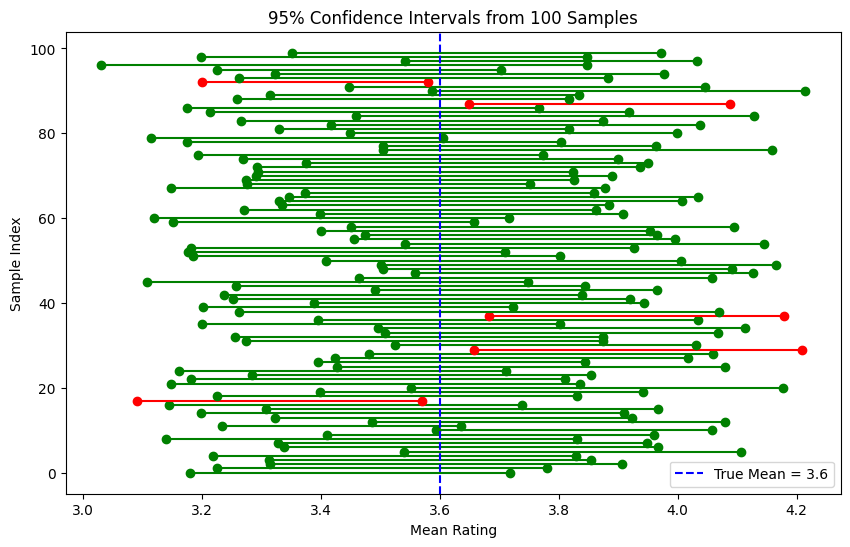

Intervals containing true mean: 95/100


In [ ]:
import matplotlib.pyplot as plt

# Parameters
true_mean = 3.6
pop_std = 0.8
n = 30
confidence = 0.95
num_samples = 100

# Step 1: simulate 100 samples
np.random.seed(42)  # for reproducibility
samples = [np.random.normal(true_mean, pop_std, n) for _ in range(num_samples)]

# Step 2 & 3: compute CI for each
ci_bounds = []
contains_true = []

for sample in samples:
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    se = sample_std / np.sqrt(n)
    t_crit = stats.t.ppf(1 - (1-confidence)/2, df=n-1)
    margin = t_crit * se
    lower, upper = sample_mean - margin, sample_mean + margin
    ci_bounds.append((lower, upper))
    contains_true.append(lower <= true_mean <= upper)

# Step 4: plot intervals
plt.figure(figsize=(10, 6))
for i, ((lower, upper), contains) in enumerate(zip(ci_bounds, contains_true)):
    color = 'green' if contains else 'red'
    plt.plot([lower, upper], [i, i], color=color, marker='o')

plt.axvline(true_mean, color='blue', linestyle='--', label=f"True Mean = {true_mean}")
plt.xlabel("Mean Rating")
plt.ylabel("Sample Index")
plt.title("95% Confidence Intervals from 100 Samples")
plt.legend()
plt.show()

# Print summary
print(f"Intervals containing true mean: {sum(contains_true)}/{num_samples}")


This will produce a plot showing each CI, with green lines for intervals containing the true mean and red lines for those missing it. You’ll also see the true mean marked as a dashed blue line.

In this simulation, you should expect about 95 out of 100 intervals to contain the true mean.